In [1]:
import numpy as np

In [2]:
from qiskit import *

In [3]:
circ=QuantumCircuit(3)

In [4]:
circ.h(0)

In [5]:
circ.cx(0,1)

In [6]:
circ.cx(0,2)

In [7]:
from qiskit import Aer

In [8]:
backend=Aer.get_backend('statevector_simulator')

In [9]:
job=backend.run(circ)

In [10]:
result=job.result()

In [45]:
outputstate=result.get_statevector(circ, decimals=3)

In [46]:
print(outputstate)

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


In [19]:
from qiskit.visualization import plot_state_city

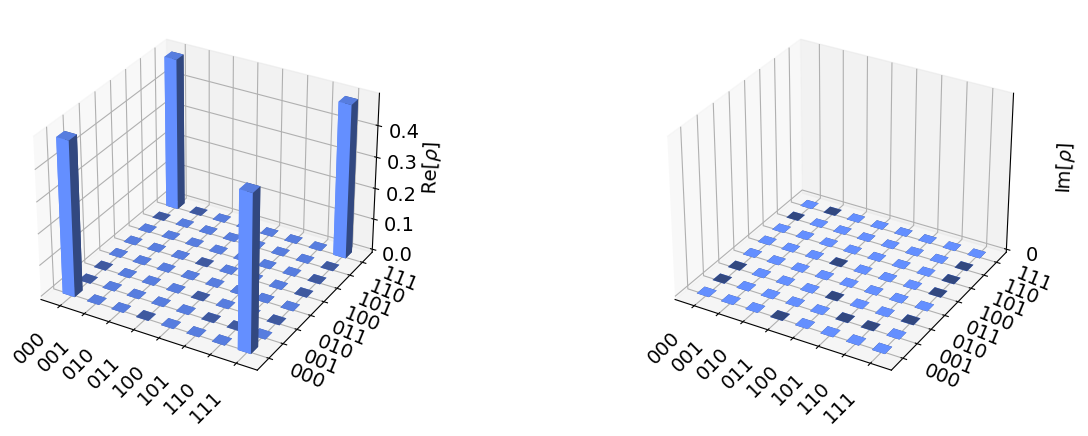

In [20]:
plot_state_city(outputstate)

In [48]:
backend=Aer.get_backend('unitary_simulator')

In [49]:
job=backend.run(circ)

In [50]:
result=job.result()

In [51]:
print(result.get_unitary(circ,decimals=3))

Operator([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j, -0.707+0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
           -0.707+0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
            0.707-0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j],
          [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.707+0.j,  0.707-0.j],
          [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
            0.   +0.j,  0.   +0.j,  0.   +0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 

In [52]:
meas=QuantumCircuit(3,3)

In [54]:
meas.barrier(range(3))

In [55]:
meas.measure(range(3), range(3))

In [57]:
circ.add_register(meas.cregs[0])

In [58]:
qc=circ.compose(meas)

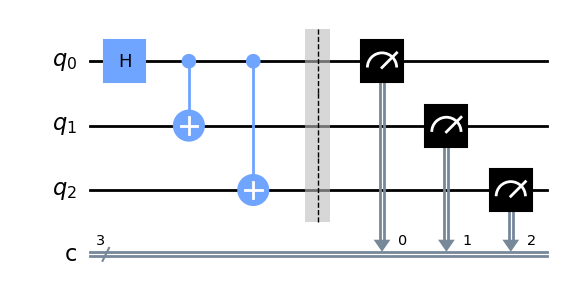

In [62]:
qc.draw(output='mpl')

In [63]:
backend_sim=Aer.get_backend('qasm_simulator')

In [64]:
job_sim=backend_sim.run(transpile(qc,backend_sim), shots=1024)

In [65]:
result_sim=job_sim.result()

In [66]:
counts=result_sim.get_counts(qc)

In [67]:
print(counts)

{'000': 543, '111': 481}


In [71]:
from qiskit.visualization import plot_histogram

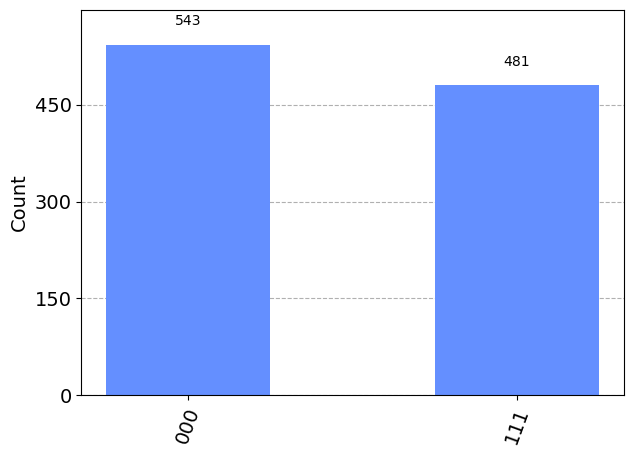

In [73]:
plot_histogram(counts)